# ML with Logistic Regression

In this notebook, we will use the functions in the file logistic_regression.py. 

In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from IPython import display
# Import everything in the functions folder
from functions.costs import *
from functions.proj1_helpers import *
from functions.split import *
from functions.logistic_regressionM import *
from functions.helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, we load the cleaned data

In [6]:
DATA_TRAIN_PATH = 'data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
tX, mean_tX, std_tX = standardize(tX)

We split the data, just to see if we can predict something

In [7]:
ratio = 0.8
x_train, y_train, x_test, y_test = split_data(tX, y, ratio)

We plot the graph Loss vs Epochs while doing the Logistic Regression

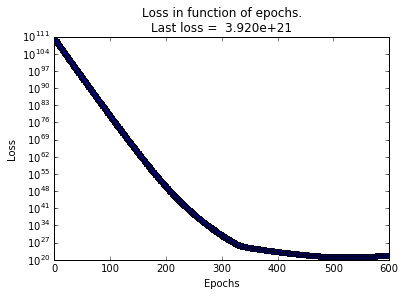

In [19]:
# Define the parameters of the algorithm.
max_iters = 600
gamma = 1e-7

# Initialization
losses, ws = logistic_regression(y_train, x_train, gamma, max_iters)

In [20]:
w_star, min_loss = get_best_model(losses, ws)
print("Min loss = %f"%(min_loss))

Min loss = 1101873520209936908288.000000


In [21]:
prediction(y_test, x_test, w_star)  

Good prediction: 34825/50000 (69.650000%)
Wrong prediction: 15175/50000 (30.350000%)


## Generate predictions and save ouput in csv format for submission:

We retrain on all the data

Min loss = 953888109653171896320.000000


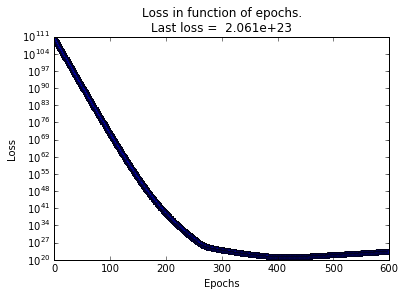

In [22]:
# Define the parameters of the algorithm.
max_iters = 600
gamma = 1e-7

# Initialization
losses, ws = logistic_regression(y, tX, gamma, max_iters)
w_star, min_loss = get_best_model(losses, ws)
print("Min loss = %f"%(min_loss))

In [26]:
DATA_TEST_PATH = 'data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
tX_test, mean_tX_test, std_tX_test = standardize(tX_test)

In [27]:
OUTPUT_PATH = 'output/LR_GD.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w_star, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)